**FastAI book chapter 5, Pet Breeds**
Image classification, attempting to get it to run on my GTX 1080Ti
Based off of this copy of the book: https://github.com/flyinacres/fastbook/blob/master/05_pet_breeds.ipynb

Need to install fastai.  Probably could add this to the conda environment if I find that I need to do this often

In [1]:
# installing/upgrading fastai2 
!pip install --upgrade fastai

In [2]:
%matplotlib inline
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

Check to ensure that my GPU is visible and selectable

In [3]:
# Test to ensure that my cuda is still visible
import torch as torch
torch.cuda.is_available()

True

In [4]:
torch.cuda.set_device(0)
torch.cuda.current_device()

0

In [5]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1080 Ti'

Now set up the fastbook itself

In [6]:
# installing/upgrading fastai2 
!pip install --upgrade fastbook

     ---------------------------------------- 0.0/130.7 kB ? eta -:--:--
     ------------------------ -------------- 81.9/130.7 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 130.7/130.7 kB 1.9 MB/s eta 0:00:00
  Using cached aiohttp-3.9.3-cp311-cp311-win_amd64.whl.metadata (7.6 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     -------------------------------------- 42.0/42.0 kB 675.2 kB/s eta 0:00:00
  Using cached frozenlist-1.4.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp311-cp311-win_amd64.whl.metadata (4.3 kB)
  Using cached yarl-1.9.4-cp311-cp311-win_amd64.whl.metadata (32 kB)
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
    --------------------------------------- 10.2/719.8 kB ? eta -:--:--
   --- ----------------------------------- 61.4/719.8 kB 825.8 kB/s eta 0:00:01
   ---- -------------------

In [7]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [8]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [ ]:
Now get the specific resources for this project
All of this data is likely crowding up my drive--will need to remember to erase it at some point

In [9]:
path = untar_data(URLs.PETS)

In [10]:
#hide
Path.BASE_PATH = path
path.ls()

(#2) [Path('annotations'),Path('images')]

In [11]:
(path/"images").ls()

(#7393) [Path('images/Abyssinian_1.jpg'),Path('images/Abyssinian_10.jpg'),Path('images/Abyssinian_100.jpg'),Path('images/Abyssinian_100.mat'),Path('images/Abyssinian_101.jpg'),Path('images/Abyssinian_101.mat'),Path('images/Abyssinian_102.jpg'),Path('images/Abyssinian_102.mat'),Path('images/Abyssinian_103.jpg'),Path('images/Abyssinian_104.jpg')...]

In [12]:
fname = (path/"images").ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)


['Abyssinian']

In [13]:

pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

Original code used a different image set (bear recognition).  Modified this to work with current images.

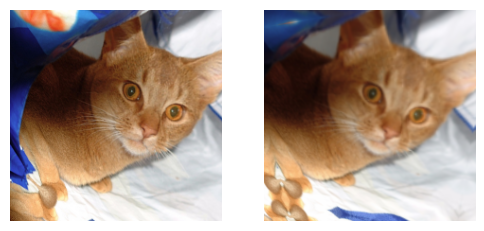

In [16]:
#hide_input
#id interpolations
#caption A comparison of fastai's data augmentation strategy (left) and the traditional approach (right).
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
dls1 = dblock1.dataloaders([(path/'images'/'Abyssinian_100.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);
     

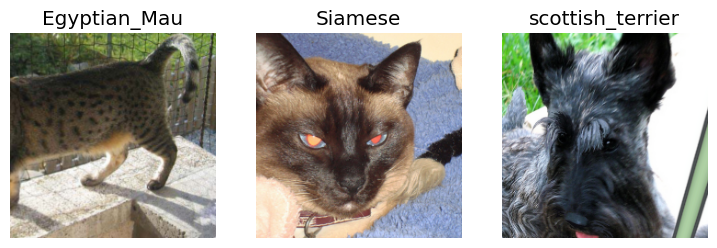

In [17]:
dls.show_batch(nrows=1, ncols=3)

In [19]:
#hide_output
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")
     

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\ron-w\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\ron-w\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 375, 500])
	Item at index 1 has shape: torch.Size([3, 199, 300])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

Note the times here.  In the fastbook example I saved:  
https://github.com/flyinacres/fastbook/blob/master/05_pet_breeds.ipynb
these were taking somewhere around 20 seconds each, using online GPUs. 
I should rerun this online with Kaggle to see if my numbers get close to the published version--
I believe that their examples use better GPUS...

In [20]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\ron-w/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 77.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.510539,0.339320,0.101489,01:36


epoch,train_loss,valid_loss,error_rate,time
0,0.509686,0.325512,0.107578,01:12
1,0.328624,0.215640,0.062923,01:11


In [21]:
x,y = dls.one_batch()

In [22]:
y

TensorCategory([14,  3, 18, 34, 36, 22,  9,  2,  8, 11, 23,  2, 23, 22,  8,  6, 15, 26, 35, 16,  9, 30, 13, 11, 14,  1, 18, 17, 23,  6, 28, 24, 17, 29, 31,  5, 26,  6, 36,  2, 25, 25, 11, 16,  5, 29,
                35, 20, 32, 12, 36,  8, 36,  0,  6, 15, 30, 27, 19,  9,  4, 32, 23,  4], device='cuda:0')

In [23]:

preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.3062e-06, 1.4085e-06, 5.0747e-06, 6.7784e-08, 1.0535e-07, 1.1630e-06, 3.1075e-07, 2.7419e-06, 2.3025e-06, 6.7141e-08, 4.0452e-07, 2.0721e-09, 4.3665e-07, 7.0033e-06, 9.9862e-01, 1.2779e-03,
        6.8991e-06, 2.9820e-08, 1.5269e-05, 8.7998e-07, 1.8866e-06, 5.2297e-07, 7.8626e-07, 7.7233e-07, 5.2453e-07, 1.6492e-06, 6.6002e-06, 3.1169e-06, 1.9964e-06, 1.2788e-07, 2.0936e-05, 1.3751e-06,
        3.8042e-06, 7.8754e-06, 3.3788e-06, 4.7720e-07, 8.8506e-07])

In [24]:

len(preds[0]),preds[0].sum()

(37, tensor(1.0000))

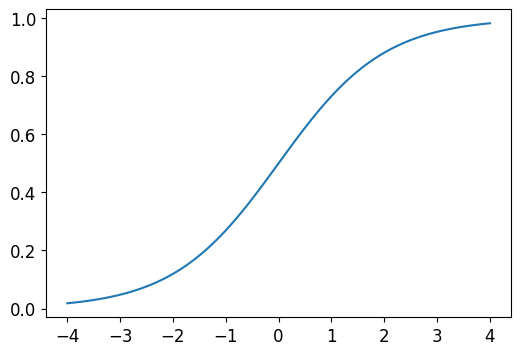

In [25]:
plot_function(torch.sigmoid, min=-4,max=4)

In [26]:
#hide
torch.random.manual_seed(42);

In [27]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [28]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [29]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [30]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [31]:
targ = tensor([0,1,0,1,1,0])


In [32]:
idx = range(6)
sm_acts[idx, targ]


tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [33]:

#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('')[1]
html = re.sub(r'', r'', html)
display(HTML(html))

AttributeError: 'Styler' object has no attribute 'hide_index'

In [34]:
-sm_acts[idx, targ]


tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [35]:
F.nll_loss(sm_acts, targ, reduction='none')


tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

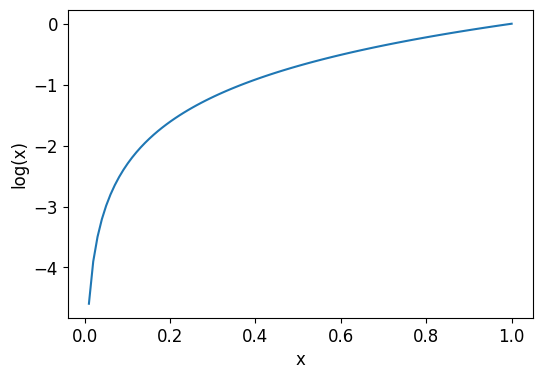

In [36]:
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')


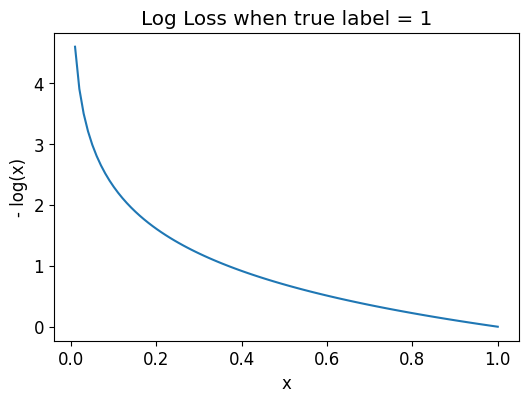

In [37]:
plot_function(lambda x: -1*torch.log(x), min=0,max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')


In [38]:
#hide_input
from IPython.display import HTML
df['loss'] = -torch.log(tensor(df['result']))
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('')[1]
html = re.sub(r'', r'', html)
display(HTML(html))

AttributeError: 'Styler' object has no attribute 'hide_index'

In [39]:
loss_func = nn.CrossEntropyLoss()
loss_func(acts, targ)


tensor(1.8045)

In [41]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)


tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

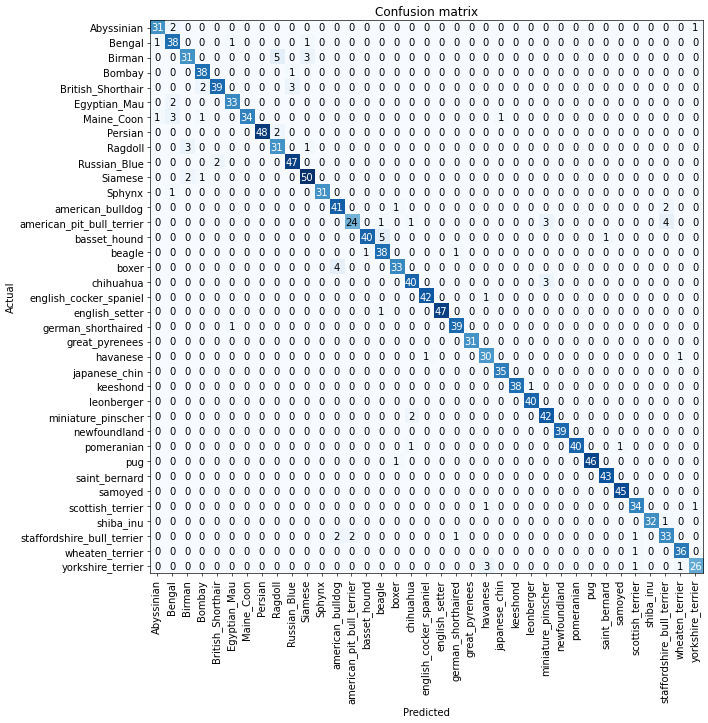

In [42]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [43]:
interp.most_confused(min_val=5)


[('Birman', 'Ragdoll', 5), ('basset_hound', 'beagle', 5)]

Some of the results I am getting are better than those shown in the original Jupyter notebook.
I strongly doubt this has anything to do with my GPU :)
Rather, I suspect that this is either the result of random data (NNs are initiallized randomly),
and/or improvements to the algorithms since the original publishing of the notebook.

In [44]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.634752,4.238015,0.449256,01:08


epoch,train_loss,valid_loss,error_rate,time
0,3.287173,1.583632,0.501353,01:12


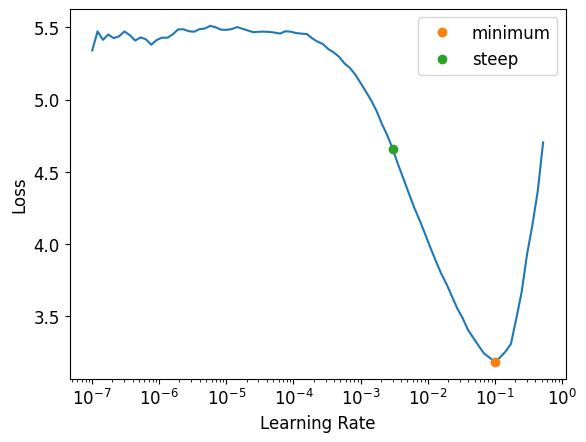

In [45]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [46]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 3.02e-03


In [47]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)
     

epoch,train_loss,valid_loss,error_rate,time
0,1.326525,0.304899,0.087957,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.550588,0.349464,0.099459,01:12
1,0.333583,0.243367,0.079161,01:11


In [48]:
learn.fine_tune??

Signature:
learn.fine_tune(
    epochs,
    base_lr=0.002,
    freeze_epochs=1,
    lr_mult=100,
    pct_start=0.3,
    div=5.0,
    *,
    lr_max=None,
    div_final=100000.0,
    wd=None,
    moms=None,
    cbs=None,
    reset_opt=False,
    start_epoch=0,
)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR."
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      d:\dev\anaconda\envs\cuda_test\lib\site-packages\fastai\callback\schedule.py
Type:      method

In [49]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.147277,0.313367,0.102165,01:06
1,0.527946,0.246945,0.084574,01:06
2,0.325635,0.201493,0.065629,01:06


In [50]:

learn.unfreeze()

SuggestedLRs(valley=0.00010964782268274575)

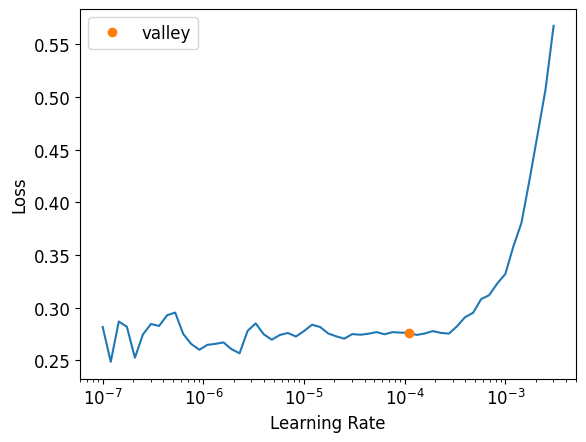

In [51]:
learn.lr_find()

In [52]:
learn.fit_one_cycle(6, lr_max=1e-5)


epoch,train_loss,valid_loss,error_rate,time
0,0.258480,0.192437,0.059540,01:12
1,0.248406,0.194595,0.062246,01:12
2,0.222819,0.187890,0.054804,01:13
3,0.190329,0.179496,0.054804,01:13
4,0.191625,0.176663,0.054127,01:12
5,0.181056,0.177083,0.054804,01:15


In [53]:
earn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))
     

epoch,train_loss,valid_loss,error_rate,time
0,3.551630,12.184885,0.960758,01:14
1,3.623077,2.997530,0.794993,01:16
2,3.111655,2.901168,0.711096,01:16


epoch,train_loss,valid_loss,error_rate,time
0,2.923757,2.618815,0.711773,01:15
1,2.873787,2.593434,0.700271,01:16
2,2.870674,2.535866,0.694181,01:15
3,2.779974,2.437794,0.687415,01:17
4,2.778949,2.512637,0.683356,01:17
5,2.742051,2.482433,0.674560,01:16
6,2.703192,2.358753,0.670501,01:16
7,2.710145,2.399510,0.669824,01:16
8,2.670958,2.579045,0.671177,01:14
9,2.678197,2.337030,0.656292,01:13


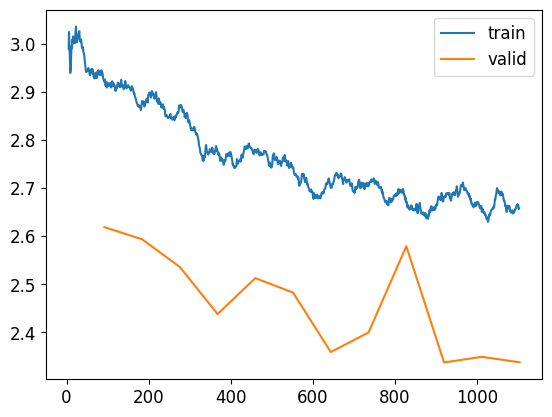

In [54]:
learn.recorder.plot_loss()


In [55]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)
     

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\ron-w/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 79.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.153805,0.475886,0.136671,01:20
1,0.850436,0.350361,0.119756,01:20
2,0.556594,0.291129,0.088633,01:20


epoch,train_loss,valid_loss,error_rate,time
0,0.295054,0.223106,0.075101,01:29
1,0.255066,0.220652,0.072395,01:31
2,0.201781,0.211116,0.063599,01:31
3,0.123740,0.216667,0.062246,01:30
4,0.089198,0.181880,0.060893,01:28
5,0.070410,0.177517,0.056157,01:29


Note that the performance info from Windows Task Manager (saved as FastBook05-02) shows that even with this larger model 
only half the onboard memory and up to half the GPU cycles are being used.  Of course many models are far larger than this, but
this is not terrible for the old architecture.

One last note--I heard a warning beep while this was running. Not sure where it was coming from, but it could have been from the UPS,
indicating too much of a power draw. Since I don't often push the GPU this is a possibility.  I should hook up my watt meter next time
I run these tests and see if it indicates anything.

Let's see if I can upload my own pet image and get it classified

In [56]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [64]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = [path.__str__()+'\images\golden_dog.jpg'])

In [63]:
??path

Type:        WindowsPath
String form: C:\Users\ron-w\.fastai\data\oxford-iiit-pet
File:        d:\dev\anaconda\envs\cuda_test\lib\pathlib.py
Source:     
class WindowsPath(Path, PureWindowsPath):
    """Path subclass for Windows systems.

    On a Windows system, instantiating a Path should return this object.
    """
    __slots__ = ()

    def is_mount(self):
        raise NotImplementedError("Path.is_mount() is unsupported on this system")

In [59]:
!ls images/golden*

ls: cannot access 'images/golden*': No such file or directory


In [65]:
img = PILImage.create(btn_upload.data[-1])

In [66]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl
     

Output()

In [68]:
pred,pred_idx,probs = learn.predict(img)


In [69]:
learn.dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [70]:
pred

'great_pyrenees'

The color is wrong, but these dogs aren't that dissimilar...  And since there aren't any goldens, this is probably OK

In [71]:
probs

tensor([8.3715e-04, 5.6728e-04, 2.1938e-03, 6.2915e-04, 4.8950e-04, 4.2218e-04, 5.1115e-02, 1.1558e-03, 7.3781e-03, 3.3742e-04, 1.3753e-04, 1.9225e-04, 2.1931e-05, 6.6160e-04, 1.6007e-03, 5.2626e-03,
        6.9562e-05, 4.2869e-03, 1.2526e-02, 4.1590e-03, 6.4290e-03, 5.4419e-01, 2.5026e-04, 4.8814e-03, 3.5125e-03, 4.7830e-02, 7.7122e-04, 1.1929e-02, 2.2953e-01, 2.1281e-04, 1.0284e-02, 3.8734e-02,
        2.0207e-04, 6.6137e-03, 1.7677e-04, 1.1581e-04, 2.9373e-04])

In [76]:
btn_upload = SimpleNamespace(data = [path.__str__()+'\images\pomerian_dog.jpg'])

In [77]:
img = PILImage.create(btn_upload.data[-1])

In [78]:
learn.predict(img)

('pomeranian',
 tensor(28),
 tensor([1.7860e-07, 3.1249e-08, 1.0268e-06, 5.9876e-08, 4.6964e-07, 2.9010e-09, 1.5239e-07, 3.2000e-06, 4.2893e-06, 2.0898e-08, 2.2578e-07, 1.2775e-08, 9.8331e-09, 1.3105e-07, 1.9271e-08, 1.2837e-08,
         4.1151e-09, 3.6190e-06, 5.6925e-08, 3.9190e-09, 1.5465e-10, 1.3440e-08, 2.8439e-08, 8.4132e-07, 1.3041e-07, 1.1861e-08, 1.1989e-08, 1.2001e-08, 9.9998e-01, 3.1571e-08, 7.1989e-08, 3.1224e-07,
         7.5099e-09, 2.9217e-07, 1.0715e-08, 1.0457e-08, 1.0011e-07]))

In [79]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

Much better, predicted the right dog, now that I gave it one that it knows about...